# 第6章　使用 `scikit-learn` 构建模型

## 任务6.2　构建并评价聚类模型

<br>
<center>
    <b>代码6-10　使用<code>sklearn</code>估计器构建<code>K-Means</code>聚类模型</b>
</center>

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
iris = load_iris()
data = iris['data']
target = iris['target']
names = iris['feature_names']
scale = MinMaxScaler().fit(data)
dataScale = scale.transform(data)
kmeans = KMeans(n_clusters=3, random_state=123).fit(dataScale)
print('构建的K-Means模型为：', kmeans, sep='\n')

构建的K-Means模型为：
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


In [2]:
result = kmeans.predict([4 * [1.5]])
print('花瓣花萼长度宽度全为1.5cm的鸢尾花预测类别为：', result[0])

花瓣花萼长度宽度全为1.5cm的鸢尾花预测类别为： 0


<br>
<center>
    <b>代码6-11　聚类结果可视化</b>
</center>

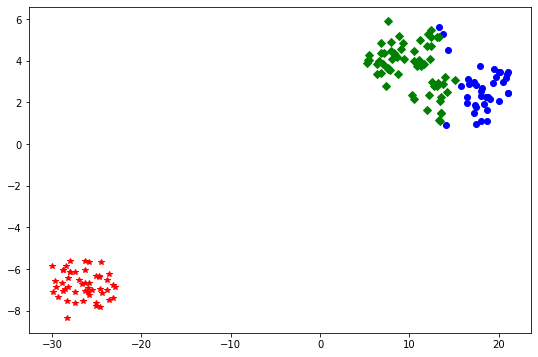

In [3]:
%matplotlib inline
import pandas
from sklearn.manifold import TSNE
from matplotlib import pyplot
tsne = TSNE(n_components=2, init='random', random_state=177).fit(data)
frame = pandas.DataFrame(tsne.embedding_)
frame['labels'] = kmeans.labels_
frame_A = frame[frame['labels'] == 0]
frame_B = frame[frame['labels'] == 1]
frame_C = frame[frame['labels'] == 2]
figure = pyplot.figure(figsize=(9, 6))
pyplot.plot(
    frame_A[0], frame_A[1], 'bo',
    frame_B[0], frame_B[1], 'r*',
    frame_C[0], frame_C[1], 'gD'
)
pyplot.savefig('img/聚类结果.svg')
pyplot.show()

<br>
<center>
    <b>代码6-12　使用<code>FMI</code>评价法评价<code>K-Means</code>聚类模型</b>
</center>

In [4]:
from sklearn.metrics import fowlkes_mallows_score
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=123).fit(data)
    score = fowlkes_mallows_score(target, kmeans.labels_)
    print('鸢尾花数据集聚%d类FMI评价分值为：%f' % (i, score))

鸢尾花数据集聚2类FMI评价分值为：0.750473
鸢尾花数据集聚3类FMI评价分值为：0.820808
鸢尾花数据集聚4类FMI评价分值为：0.753970
鸢尾花数据集聚5类FMI评价分值为：0.725483
鸢尾花数据集聚6类FMI评价分值为：0.614345


<br>
<center>
    <b>
        代码6-13　使用轮廓系数评价法评价<code>K-Means</code>聚类模型
    </b>
</center>

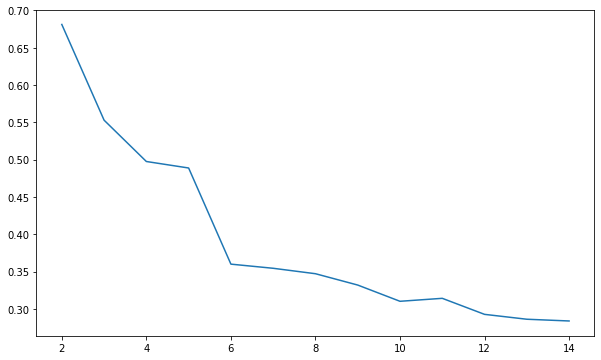

In [5]:
%matplotlib inline
from sklearn.metrics import silhouette_score
from matplotlib import pyplot
silhouetteScore = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=123).fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouetteScore.append(score)
pyplot.figure(figsize=(10, 6))
pyplot.plot(range(2, 15), silhouetteScore, linewidth=1.5, linestyle='-')
pyplot.savefig('img/轮廓系数评分.svg')
pyplot.show()

<br>
<center>
    <b>
        代码6-14　使用<code>Calinski-Harabasz</code>指数评价<code>K-Means</code>聚类模型
    </b>
</center>

In [6]:
from sklearn.metrics import calinski_harabasz_score
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=123).fit(data)
    score = calinski_harabasz_score(data, kmeans.labels_)
    print('鸢尾花数据集聚%d类的CHSZ指数为：%f' % (i, score))

鸢尾花数据集聚2类的CHSZ指数为：513.924546
鸢尾花数据集聚3类的CHSZ指数为：561.627757
鸢尾花数据集聚4类的CHSZ指数为：530.487142
鸢尾花数据集聚5类的CHSZ指数为：495.541488
鸢尾花数据集聚6类的CHSZ指数为：469.836633


<br>
<center>
    <b>代码6-15　对<code>Seeds</code>构建<code>K-Means</code>聚类模型</b>
</center>

In [7]:
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
seeds = pandas.read_csv('data/seeds_dataset.txt', sep='\t', encoding='gbk')
print('数据集形状为：', seeds.shape)
data = seeds.iloc[:, :7].values
target = seeds.iloc[:, 7].values
names = seeds.columns[:7]
stdScale = StandardScaler().fit(data)
dataScale = stdScale.transform(data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(data)
print('构建的K-Means模型为：', kmeans, sep='\n')

数据集形状为： (210, 8)
构建的K-Means模型为：
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


<br>
<center>
    <b>代码6-16　评价使用<code>Seeds</code>数据集构建的<code>K-Means</code>模型聚类</b>
</center>

In [8]:
from sklearn.metrics import calinski_harabasz_score
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=123).fit(data)
    score = calinski_harabasz_score(data, kmeans.labels_)
    print('小麦数据集聚%d类的CHSZ指数为：%f' % (i, score))

小麦数据集聚2类的CHSZ指数为：351.179992
小麦数据集聚3类的CHSZ指数为：375.804961
小麦数据集聚4类的CHSZ指数为：327.835320
小麦数据集聚5类的CHSZ指数为：310.331840
小麦数据集聚6类的CHSZ指数为：302.473069
